

---

# **1. Exploratory Data Analysis (EDA):**

*   Inspect the dataset.
*   Visualize sample images from each class.


---



In [1]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# List files in Google Drive to find the ZIP file
drive_path = '/content/drive/My Drive/'

In [4]:
import zipfile

# Path to the ZIP file in Google Drive
zip_file_path = os.path.join(drive_path, 'Take_Home_Assignment.zip')

# Directory where you want to extract the contents
extracted_path = '/content/extracted_dataset/'

# Create the extracted directory if it doesn't exist
os.makedirs(extracted_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

In [5]:
# List files in the extracted training, testing, and validation folders
train_path = os.path.join(extracted_path, 'Take_Home_Assignment', 'sleevetypes', 'train')
test_path = os.path.join(extracted_path, 'Take_Home_Assignment', 'sleevetypes', 'test')
val_path = os.path.join(extracted_path, 'Take_Home_Assignment', 'sleevetypes', 'val')

train_classes = os.listdir(train_path)
test_classes = os.listdir(test_path)
val_classes = os.listdir(val_path)

print("Train Classes:", train_classes)
print("Test Classes:", test_classes)
print("Validation Classes:", val_classes)

Train Classes: ['bell', 'dolman', 'balloon', 'cap']
Test Classes: ['bell', 'dolman', 'balloon', 'cap']
Validation Classes: ['bell', 'dolman', 'balloon', 'cap']


Training Set:


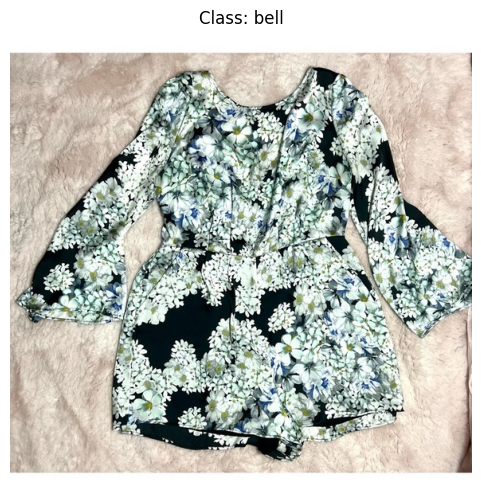

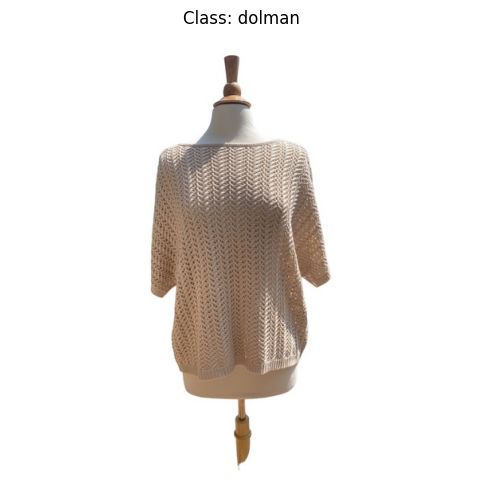

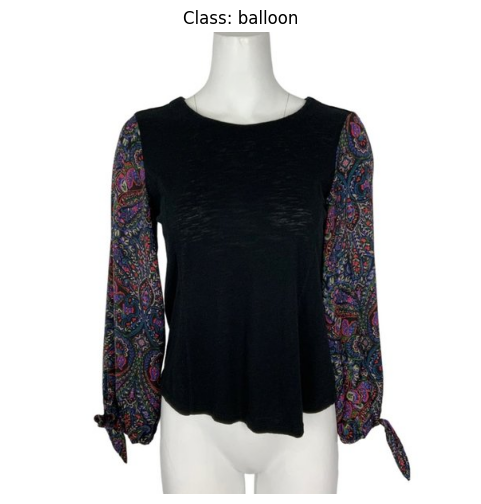

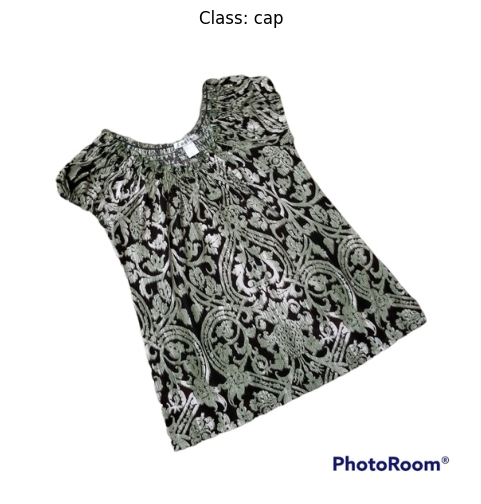

Testing Set:


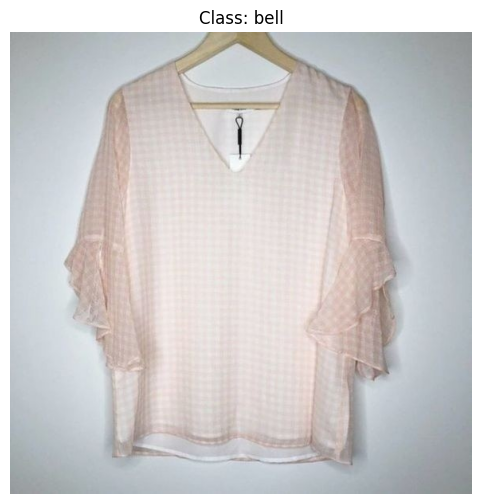

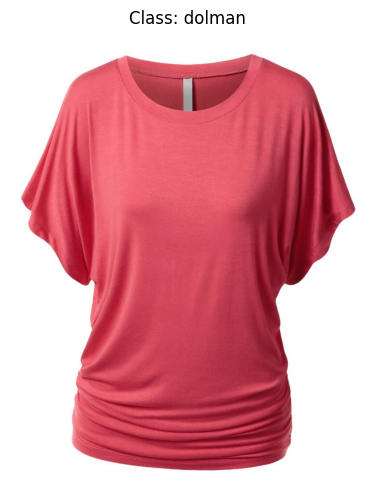

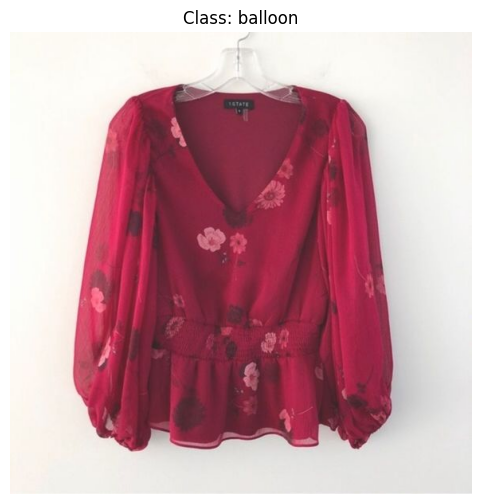

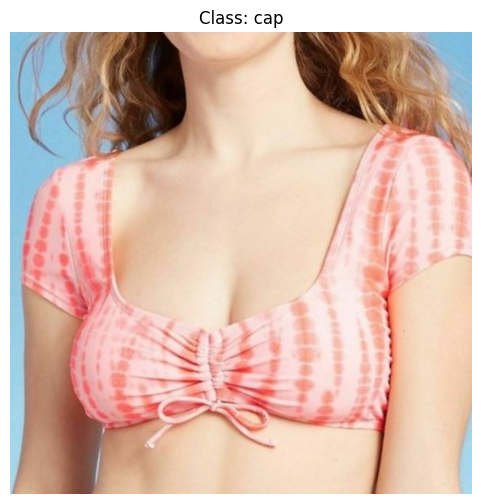

Validation Set:


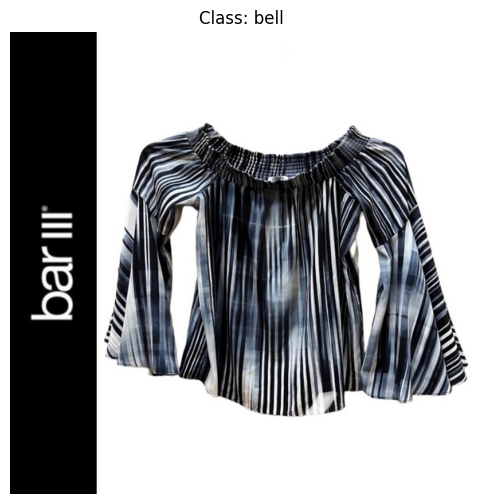

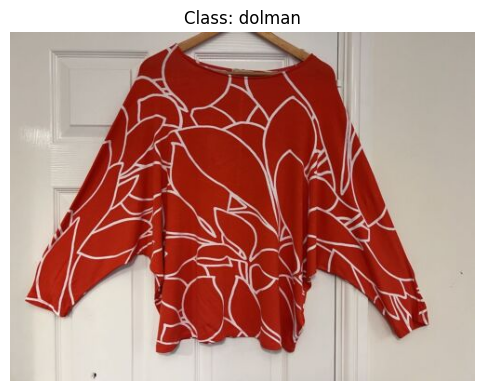

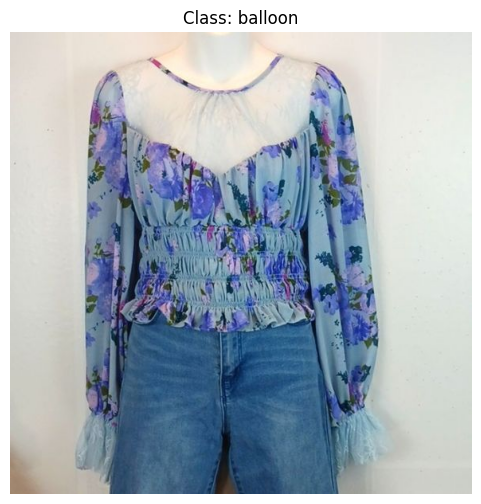

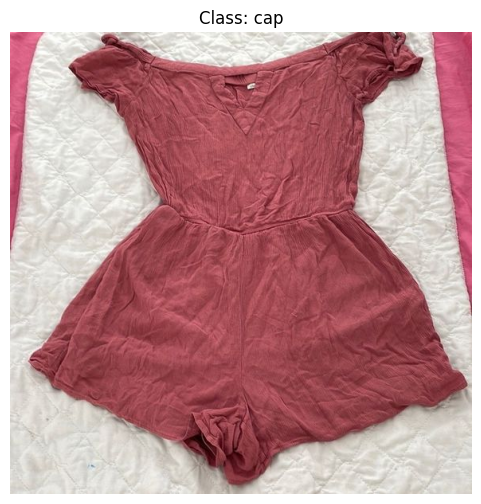

In [49]:
import os
import cv2
import matplotlib.pyplot as plt
import random

# Define the paths to the train, test, and validation directories
train_path = os.path.join(extracted_path, 'Take_Home_Assignment', 'sleevetypes', 'train')
test_path = os.path.join(extracted_path, 'Take_Home_Assignment', 'sleevetypes', 'test')
val_path = os.path.join(extracted_path, 'Take_Home_Assignment', 'sleevetypes', 'val')

# Function to display one random image from each class
def visualize_one_image_per_class(directory):
    class_folders = os.listdir(directory)
    for class_folder in train_classes:
        class_path = os.path.join(directory, class_folder)
        image_files = [f for f in os.listdir(class_path) if f.endswith('.jpeg') or f.endswith('.jpg')]
        if len(image_files) > 0:
            random_image = random.choice(image_files)
            image_path = os.path.join(class_path, random_image)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(6, 6))
            plt.imshow(image)
            plt.title(f'Class: {class_folder}')
            plt.axis('off')
            plt.show()

# Visualize one image from each class in the training set
print("Training Set:")
visualize_one_image_per_class(train_path)

# Visualize one image from each class in the testing set
print("Testing Set:")
visualize_one_image_per_class(test_path)

# Visualize one image from each class in the validation set
print("Validation Set:")
visualize_one_image_per_class(val_path)



In [50]:
pip install git+https://github.com/openai/CLIP.git


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-65nwxxjt
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-65nwxxjt
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done


In [8]:
import clip
import torch
from torch.utils.data import DataLoader

# Load CLIP Model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:24<00:00, 14.6MiB/s]


In [9]:
# Label Encoding (Example for CLIP-style text labels)
class_descriptions = [
    "a photo of dell sleevs",
    "a photo of balloon sleeves",
    "a photo of cap sleeves",
    "a photo of dolman sleeves"
]

In [11]:
# # Encoding few-shot image and matching to text descriptions
# with torch.no_grad():
#     text_features = model.encode_text(clip.tokenize(class_descriptions).to(device))
#     # image_features = model.encode_image(few_shot_example)
#     # logits_per_image, logits_per_text = model(few_shot_example, text_features)

#     few_shot_example = torch.tensor(few_shot_example).to(torch.int64)  # Ensure it's Long tensor
#     image_features = model.encode_image(few_shot_example)
#     print(type(text_features))
#     print(type(few_shot_example))

#     logits_per_image, logits_per_text = model(few_shot_example, text_features)
#     probs = logits_per_image.softmax(dim=1)[0]  # The class probabilities

# # Print the results
# for i, (cls_description, prob) in enumerate(zip(class_descriptions, probs)):
#     print(f"Class: {cls_description}, Probability: {prob.item() * 100:.2f}%")



---

# **2. Prepare the data for few-shot learning.**


*   Prepare the data for few-shot learning.
*   Implement necessary data augmentation techniques to improve the model’s performance.



---






In [12]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.0 MB/s eta 0:00:00




---

Testing out the model with basic examples of balloon and cap sleeves

---



In [14]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

image_path = "/content/extracted_dataset/Take_Home_Assignment/sleevetypes/train/balloon/poshmark_flatlay_balloon_1.jpeg"
# image = Image.open(requests.get(url, stream=True).raw)
image = Image.open(image_path)


inputs = processor(text=["cap sleeves", "balloon sleeves"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

In [15]:
print(probs)

tensor([[0.8788, 0.1212]], grad_fn=<SoftmaxBackward0>)



---

Testing out the model with basic standard examples

---

In [16]:
inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)

In [17]:
print(probs)

tensor([[0.6107, 0.3893]], grad_fn=<SoftmaxBackward0>)


In [18]:
# Standard library imports
import matplotlib.pyplot as plt
import sys
from pathlib import Path
import os
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


In [19]:
# third party imports
import clip

In [20]:
train_classes = os.listdir(train_path)
test_classes = os.listdir(test_path)
val_classes = os.listdir(val_path)

print("Train Classes:", train_classes)

Train Classes: ['bell', 'dolman', 'balloon', 'cap']


In [21]:
class_names = train_classes

In [22]:
# Load CLIP pre-trained model
model, transform = clip.load("ViT-B/32", device=device)
print(f"Model dir: {os.path.expanduser('~/.cache/clip')}")

Model dir: /root/.cache/clip


In [23]:
# Get the encoded text features of possible labels
class_captions = [f"a photo of a {x}" for x in train_classes]
text_input = clip.tokenize(class_captions).to(device)

In [24]:
with torch.no_grad():
    text_features = model.encode_text(text_input).float()
    text_features /= text_features.norm(dim=-1, keepdim=True)
print(f"Text features shape: {text_features.shape}")

Text features shape: torch.Size([4, 512])


In [25]:
DATA_FEWSHOT = '/content/extracted_dataset/Take_Home_Assignment/sleevetypes/train'

In [26]:
# prepare test images dataset
dataset = ImageFolder(root=DATA_FEWSHOT, transform=transform)
dataloader = DataLoader(dataset, batch_size=2, shuffle=False)
dataset_idx_to_class = {dataset.class_to_idx[k]:k for k in dataset.class_to_idx}

# **Method 1** :



---





* image and label are unpacked from the batch. image likely represents the images, and label represents their corresponding ground truth class labels.

* The image tensor is moved to the specified device (e.g., GPU) using image = image.to(device) for efficient processing on the available hardware.

* image_features are extracted from the model using model.encode_image(image).float(). This suggests that the model has an image encoder that extracts features from the input image.

* Similarity scores between the image features and text features are computed. It appears that the model can associate images with text descriptions. The similarity computation is done using dot products and softmax normalization:


> `similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)`


* This line calculates the similarity scores between image features and text features, scaled by 100.0 and applying softmax along the last dimension (-1).







---



In [27]:
pred_class_names, gt_class_names = [], []
with torch.no_grad():
    for data in dataloader:
        image, label = data
        image = image.to(device)
        image_features = model.encode_image(image).float()
        similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
        pred_class_idx = torch.argmax(similarity, dim=1)
        pred_class_names_batch = [class_names[i] for i in pred_class_idx]
        gt_class_names_batch = [dataset_idx_to_class[k] for k in label.tolist()]
        pred_class_names.extend(pred_class_names_batch)
        gt_class_names.extend(gt_class_names_batch)

Here's a short description of what the provided code is doing in bullet points:

- **Confusion Matrix**: The code calculates a confusion matrix (`cf_mat`) to evaluate the performance of a model's predictions. This matrix compares predicted class names (`pred_class_names`) against ground truth class names (`gt_class_names`).

- **Display**: It uses `ConfusionMatrixDisplay` to display the confusion matrix as a visual plot (`disp.plot(ax=ax)`).

- **Save Visualization**: The resulting confusion matrix plot is saved as an image file named 'clip_fewshot_train.png'.

- **Save Classification Report**: The code generates a classification report for the model's predictions, including metrics such as precision, recall, and F1-score. This report is saved as a text file named 'clip_fewshot_train.txt'.

[[ 0 16  0  0]
 [ 0 16  0  0]
 [ 0 16  0  0]
 [ 0 16  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


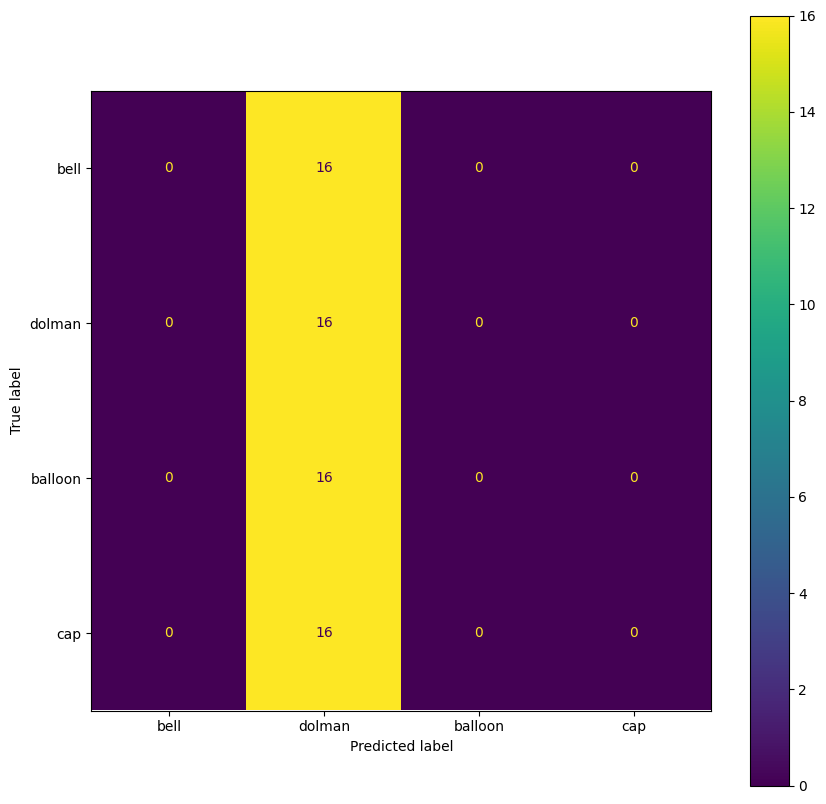

In [28]:
# eval metrics
fig, ax = plt.subplots(figsize=(10,10))
cf_mat = confusion_matrix(gt_class_names, pred_class_names, labels=class_names)
print(cf_mat)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_mat, display_labels=class_names)
disp.plot(ax=ax)
plt.savefig('clip_fewshot_train.png')
with open('clip_fewshot_train.txt', 'w') as fp:
    fp.write(classification_report(gt_class_names, pred_class_names, labels=class_names))



---

# **Method 2** : **Nearest Class Mean (NCM)**



---



In [29]:
# set constants
DATA_FEWSHOT_TRAIN =  "/content/extracted_dataset/Take_Home_Assignment/sleevetypes/train"
DATA_FEWSHOT_TEST =  "/content/extracted_dataset/Take_Home_Assignment/sleevetypes/test"

In [30]:
DATA_FEWSHOT_VAL = "/content/extracted_dataset/Take_Home_Assignment/sleevetypes/val"

In [31]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load CLIP pre-trained model
model, transform = clip.load("ViT-B/32", device=device)
print(f"Model dir: {os.path.expanduser('~/.cache/clip')}")


Model dir: /root/.cache/clip




---



Here's a short description of the provided code:

- `Net` class: This is a PyTorch neural network module defined with a constructor `__init__` and a `forward` method. It's a simple feedforward network with one linear layer followed by a log-softmax activation. This network takes an input feature vector of size `in_feat` and produces an output feature vector of size `out_feat`.

- `load_imgs` function: This function loads images from a folder specified by `path_to_folder`, applies a series of transformations to each image using the provided `transform` function, and returns the transformed images as a torch tensor. It uses the Python Imaging Library (PIL) to open and manipulate image files and then stacks them into a tensor.

- `getTransform` function: This function takes a `clip_transform` (which is likely another transformation function) and returns a composite transformation that includes color jittering, random rotation, and the provided `clip_transform`. This is useful for augmenting and preprocessing images before they are fed into a model, commonly used in computer vision tasks to improve model robustness.

In summary, this code defines a neural network model (`Net` class), provides a function to load and preprocess images (`load_imgs`), and offers a way to create a composite image transformation (`getTransform`) for data augmentation and preprocessing.




---



In [32]:
import torch
from PIL import Image
import glob
from torchvision.transforms import Compose, ColorJitter, RandomRotation

class Net(torch.nn.Module):

    def __init__(self, in_feat=512, out_feat=8):
        super(Net, self).__init__()
        #self.linear1 = torch.nn.Linear(in_feat, in_feat)
        self.linear2 = torch.nn.Linear(in_feat, out_feat)
        self.m = torch.nn.LogSoftmax(dim=1)

    def forward(self, X):
        X = self.m(self.linear2(X))
        return X


def load_imgs(path_to_folder, transform):
    imgs = []
    paths = glob.glob(str(path_to_folder))
    for p in paths:
        img = Image.open(p)
        img = transform(img)
        imgs.append(img)
    imgs = torch.stack(imgs)
    return imgs

def getTransform(clip_transform):
    return Compose([
       ColorJitter(brightness=0.5, contrast=0.4, saturation=0.5, hue=0.3),
       RandomRotation(degrees=(0,90)),
       clip_transform
    ])

# def getTransform(clip_transform):
#     return Compose([
#         ColorJitter(brightness=0.5, contrast=0.4, saturation=0.5, hue=0.3),
#         RandomRotation(degrees=(0, 90)),
#         RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),
#         GaussianBlur(kernel_size=5),  # Adjust kernel_size as needed
#         RandomHorizontalFlip(),
#         RandomVerticalFlip(),
#         clip_transform,
#         # ToTensor(),
#     ])


- A loop iterates through each class name in `class_names`.

- Inside the loop:
   - It constructs the full path to the images for the current class by joining `DATA_FEWSHOT_TRAIN`, the class name, and `'*'` (wildcard) using the `joinpath` method.
   - It loads all the images for the current class using the `load_imgs` function, applies transformations, and moves them to the specified device (e.g., GPU).
   - It calculates the image features (likely CLIP features) for all the images in the current class using the `model.encode_image` function.
   - It computes the mean of the image features along the first dimension (usually the batch dimension) to get the mean feature vector for the class.
   - The mean feature vector for the class is appended to the `class_mean_feat` list.

- After the loop, `class_mean_feat` is stacked into a tensor and then unsqueezed along the first dimension (batch dimension). This likely results in a tensor that contains the mean feature vectors for all classes.

In summary, this code loads and processes images for each class in the training dataset, calculates the mean feature vector for each class using the CLIP model, and stores these mean feature vectors in a tensor. These mean features can be useful for few-shot learning and image classification.

In [33]:
# get all the class names
class_names = os.listdir(DATA_FEWSHOT_TRAIN)

# store mean feature (CLIP) of all train images per class
class_mean_feat = []
for class_ in class_names:
    # Load train images
        # Ensure DATA_FEWSHOT_TRAIN is a Path object
    data_fewshot_train = Path(DATA_FEWSHOT_TRAIN)
    # Create the full path by joining data_fewshot_train, class_, and '*'
    image_path = data_fewshot_train.joinpath(class_, '*')
    images = load_imgs(image_path, transform)
    images = images.to(device)
    with torch.no_grad():
        image_features = model.encode_image(images)
        image_features_mean = torch.mean(image_features, dim=0)
        class_mean_feat.append(image_features_mean)
class_mean_feat = torch.stack(class_mean_feat).unsqueeze(0)

In [34]:
# get all the class names
class_names = os.listdir(DATA_FEWSHOT_TRAIN)

# store mean feature (CLIP) of all train images per class
class_mean_feat = []
class_mean_feat_val = []


for class_ in class_names:
    # Load train images
        # Ensure DATA_FEWSHOT_TRAIN is a Path object
    data_fewshot_train = Path(DATA_FEWSHOT_TRAIN)
    # Create the full path by joining data_fewshot_train, class_, and '*'
    image_path = data_fewshot_train.joinpath(class_, '*')
    images = load_imgs(image_path, transform)
    images = images.to(device)
    with torch.no_grad():
        image_features = model.encode_image(images)
        image_features_mean = torch.mean(image_features, dim=0)
        class_mean_feat.append(image_features_mean)
class_mean_feat = torch.stack(class_mean_feat).unsqueeze(0)

# Load mean features for the validation dataset
for class_ in class_names:
    # Load images from the validation dataset
    # Define the path to the validation dataset
    data_fewshot_val = Path(DATA_FEWSHOT_VAL)
    val_image_path = data_fewshot_val.joinpath(class_, '*')
    val_images = load_imgs(val_image_path, transform)
    val_images = val_images.to(device)

    with torch.no_grad():
        val_image_features = model.encode_image(val_images)
        val_image_features_mean = torch.mean(val_image_features, dim=0)
        class_mean_feat_val.append(val_image_features_mean)

# Stack and unsqueeze the validation mean features
class_mean_feat_val = torch.stack(class_mean_feat_val).unsqueeze(0)

- The code performs testing using the Nearest Class Mean (NCM) approach:
  - It iterates through each class in `class_names`.
  - For each class:
    - Loads test images for that class.
    - Computes image features for the test images using the CLIP model.
    - Calculates the distance between each test image's feature and the mean feature vector of each class.
    - Determines the predicted class by selecting the class with the nearest mean feature.
    - Extends the ground truth class names and predicted class names lists based on the results of this classification.

In essence, this code classifies test images by finding the class with the closest mean feature vector from the training data (NCM) and records the ground truth and predicted class names for evaluation.

In [35]:
# Testing starts: classify based on nearest class mean from training data (NCM)
pred_class_names, gt_class_names = [], []
for class_ in class_names:
    print(class_)
    # Load test images
    data_fewshot_train = Path(DATA_FEWSHOT_TEST)
    # Create the full path by joining data_fewshot_train, class_, and '*'
    image_path = data_fewshot_train.joinpath(class_, '*')
    images = load_imgs(image_path, transform)
    images = images.to(device)
    with torch.no_grad():
        test_image_features = model.encode_image(images)
        class_dist_mat = torch.cdist(test_image_features.unsqueeze(0), class_mean_feat, p=2.0)
        class_dist_mat = class_dist_mat[0]
        pred_class = torch.argmin(class_dist_mat, dim=1)
        gt_class_names.extend([class_]*len(pred_class))
        pred_class_names.extend([class_names[k] for k in pred_class.tolist()])


bell
dolman
balloon
cap


[[ 1  1  2  0]
 [ 0  4  0  0]
 [ 0  3  6  0]
 [ 2  1  0 11]]


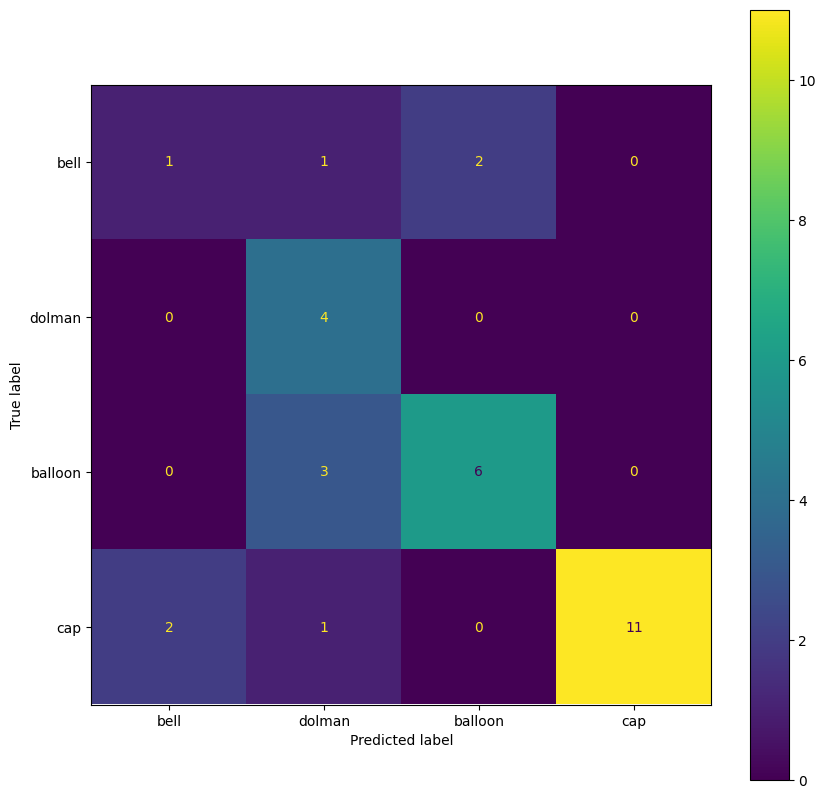

In [36]:
# eval metrics
fig, ax = plt.subplots(figsize=(10,10))
cf_mat = confusion_matrix(gt_class_names, pred_class_names, labels=class_names)
print(cf_mat)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_mat, display_labels=class_names)
disp.plot(ax=ax)
plt.savefig('NCM_fewshot.png')
with open('NCM_fewshot.txt', 'w') as fp:
    fp.write(classification_report(gt_class_names, pred_class_names, labels=class_names))



---



# **Method 3 : Training using train and validation datasets.**



---



In [38]:
# Load CLIP pre-trained model
CLIP_model, clip_transform = clip.load("ViT-B/32", device=device)
print(f"CLIP Model dir: {os.path.expanduser('~/.cache/clip')}")

CLIP Model dir: /root/.cache/clip


In [39]:
# initialize/load network
net = Net()
net = net.to(device)
net.train()
nllloss = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=.0005)

In [40]:
# prepare dataset
dataset = ImageFolder(root=DATA_FEWSHOT_TRAIN, transform = getTransform(clip_transform))
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
dataset_idx_to_class = {dataset.class_to_idx[k]:k for k in dataset.class_to_idx}
class_names = os.listdir(DATA_FEWSHOT_TRAIN)

In [41]:
dataset_test = ImageFolder(root=DATA_FEWSHOT_TEST, transform = clip_transform)
dataloader_test = DataLoader(dataset_test, batch_size=32, shuffle=False)

In [42]:
num_epochs = 50

In [ ]:
# training loop
_f1score = 0.0
for epoch in range(num_epochs):
    # train if not in test mode

    loss_epoch = 0
    for data in dataloader:
        image, label = data
        #image = clip_transform(image)
        image, label = image.to(device), label.to(device)
        with torch.no_grad():
            image_features = CLIP_model.encode_image(image).float()
        optimizer.zero_grad()
        output = net(image_features)
        loss = nllloss(output, label)
        loss.backward()
        optimizer.step()
        loss_epoch = loss_epoch + loss.item()

    print('epoch: {} loss: {}'.format(epoch, loss_epoch))

epoch: 0 loss: 4.117510795593262
epoch: 1 loss: 3.9935994148254395
epoch: 2 loss: 3.804926037788391
epoch: 3 loss: 3.6285375356674194
epoch: 4 loss: 3.5321853160858154
epoch: 5 loss: 3.453526258468628
epoch: 6 loss: 3.368696451187134
epoch: 7 loss: 3.2748554944992065
epoch: 8 loss: 3.213523745536804
epoch: 9 loss: 3.1231974363327026
epoch: 10 loss: 3.0946139097213745
epoch: 11 loss: 3.0464545488357544
epoch: 12 loss: 2.984845280647278
epoch: 13 loss: 2.9399067163467407
epoch: 14 loss: 2.907746195793152
epoch: 15 loss: 2.8641265630722046
epoch: 16 loss: 2.819232940673828
epoch: 17 loss: 2.8608851432800293
epoch: 18 loss: 2.803152084350586
epoch: 19 loss: 2.7608418464660645
epoch: 20 loss: 2.7466554641723633
epoch: 21 loss: 2.7169193029403687
epoch: 22 loss: 2.7104474306106567
epoch: 23 loss: 2.6764371395111084
epoch: 24 loss: 2.6183876991271973
epoch: 25 loss: 2.6282609701156616
epoch: 26 loss: 2.6434247493743896
epoch: 27 loss: 2.580849528312683
epoch: 28 loss: 2.567826747894287
epoch:



---


- It is a neural network model for a certain number of epochs (defined as `num_epochs`, which is set to 100).
- The code uses a DataLoader to load and batch data from the validation dataset (`dataset_val`) and sets the batch size to 32.
- Inside the training loop (for each epoch), the following steps occur:
  - Training Phase:
    - It iterates through the training DataLoader (`dataloader`) to process batches of image-label pairs.
    - Images are transformed (likely using CLIP-specific transformations), moved to the specified device (e.g., GPU), and passed through the CLIP model to obtain image features.
    - The neural network (`net`) is trained to predict class labels based on the image features.
    - Loss is computed and backpropagated to update model parameters.
    - Training loss for the epoch is accumulated.
  - Validation Phase:
    - It iterates through the validation DataLoader (`dataloader_val`) to evaluate the model's performance on the validation dataset.
    - Similar to the training phase, images are transformed, and image features are extracted.
    - Model predictions are compared to ground truth labels to compute validation loss and accuracy.
    - Validation loss and accuracy for the epoch are printed.

Overall, this code trains and evaluates a neural network model using the CLIP model's image features on a dataset for a specified number of epochs, tracking training and validation loss, as well as validation accuracy.


---



In [51]:
dataset_val = ImageFolder(root=DATA_FEWSHOT_VAL, transform=clip_transform)
dataloader_val = DataLoader(dataset_val, batch_size=32, shuffle=False)

_f1score = 0.0

num_epochs = 100
for epoch in range(num_epochs):
    # Training phase
    loss_epoch = 0
    for data in dataloader:
        image, label = data
        #image = clip_transform(image)
        image, label = image.to(device), label.to(device)
        with torch.no_grad():
            image_features = CLIP_model.encode_image(image).float()
        optimizer.zero_grad()
        output = net(image_features)
        loss = nllloss(output, label)
        loss.backward()
        optimizer.step()
        loss_epoch = loss_epoch + loss.item()
    print('epoch: {} training_loss: {}'.format(epoch, loss_epoch))

    # Validation phase
    validation_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader_val:
            image, label = data
            image, label = image.to(device), label.to(device)
            image_features = CLIP_model.encode_image(image).float()
            output = net(image_features)
            loss = nllloss(output, label)
            validation_loss += loss.item()
            _, predicted = output.max(1)
            total += label.size(0)
            correct += predicted.eq(label).sum().item()

    validation_accuracy = 100 * correct / total
    print('epoch: {} validation_loss: {} validation_accuracy: {:.2f}%'.format(epoch, validation_loss, validation_accuracy))


epoch: 0 training_loss: 2.583853602409363
epoch: 0 validation_loss: 1.359019160270691 validation_accuracy: 46.15%
epoch: 1 training_loss: 2.592117667198181
epoch: 1 validation_loss: 1.3557984828948975 validation_accuracy: 46.15%
epoch: 2 training_loss: 2.4960283041000366
epoch: 2 validation_loss: 1.3521536588668823 validation_accuracy: 46.15%
epoch: 3 training_loss: 2.4898051023483276
epoch: 3 validation_loss: 1.3485283851623535 validation_accuracy: 46.15%
epoch: 4 training_loss: 2.560805559158325
epoch: 4 validation_loss: 1.3449046611785889 validation_accuracy: 46.15%
epoch: 5 training_loss: 2.554086446762085
epoch: 5 validation_loss: 1.340590000152588 validation_accuracy: 46.15%
epoch: 6 training_loss: 2.54504656791687
epoch: 6 validation_loss: 1.3368231058120728 validation_accuracy: 46.15%
epoch: 7 training_loss: 2.489667057991028
epoch: 7 validation_loss: 1.332719087600708 validation_accuracy: 46.15%
epoch: 8 training_loss: 2.442240834236145
epoch: 8 validation_loss: 1.327937245368



---



Here's a shorter description of the provided code in bullet points:

- Activates the evaluation mode for a neural network model (`net`).

- Iterates through a test DataLoader (`dataloader_test`) to perform inference.

- For each batch of test data, it:
  - Calculates image features using the CLIP model.
  - Predicts class labels using the neural network (`net`).
  - Records both predicted and ground truth class names.

- The code is likely used for evaluating and analyzing the model's performance on a test dataset.



---



In [52]:
net.eval()
pred_class_names, gt_class_names = [], []
for data in dataloader_test:
    image, label = data
    image, label = image.to(device), label.to(device)
    with torch.no_grad():
        image_features = CLIP_model.encode_image(image).float()
    output = net(image_features)

    pred_class_idx = torch.argmax(output, dim=1)
    pred_class_names_batch = [dataset_idx_to_class[k] for k in pred_class_idx.tolist()]
    gt_class_names_batch = [dataset_idx_to_class[k] for k in label.tolist()]
    pred_class_names.extend(pred_class_names_batch)
    gt_class_names.extend(gt_class_names_batch)

In [54]:
from sklearn.metrics import f1_score


In [55]:
f1score = f1_score(gt_class_names, pred_class_names, average='micro')
cf_mat = confusion_matrix(gt_class_names, pred_class_names, labels=class_names)
print('f1score: ',f1score)

f1score:  0.7096774193548389


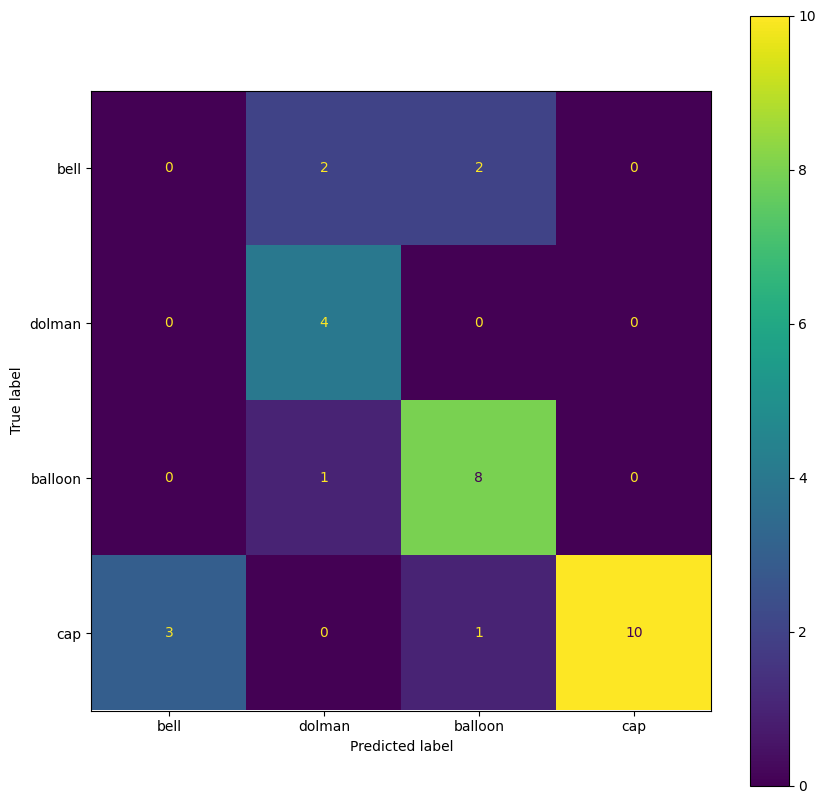

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cf_mat, display_labels=class_names)
disp.plot(ax=ax)
plt.savefig('net_fewshot.png')
with open('net_fewshot.txt', 'w') as fp:
  fp.write(classification_report(gt_class_names, pred_class_names, labels=class_names))